In [4]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [6]:
# data files to load and read
file = "Data Output/Toronto_Crimes_Occurred_2014_2019.csv"
crime_data = pd.read_csv(file)
crime_data.head()

,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
0,0,GO-20141756319,Commercial,1430.0,100.0,Assault,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,1.0,Assault,D42,132,Malvern (132),-79.199081,43.800281
1,1,GO-20143006885,Other,2120.0,200.0,B&E,2014.0,September,29.0,272.0,...,27.0,270.0,Saturday,16.0,Break and Enter,D52,76,Bay Street Corridor (76),-79.386383,43.662472
2,2,GO-20141756802,Commercial,2120.0,200.0,B&E,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,6.0,Break and Enter,D23,1,West Humber-Clairville (1),-79.612595,43.720406
3,3,GO-20141760570,Apartment,2120.0,200.0,B&E,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,15.0,Break and Enter,D33,47,Don Valley Village (47),-79.349121,43.782772
4,4,GO-20142004859,Commercial,1610.0,210.0,Robbery - Business,2014.0,May,3.0,123.0,...,3.0,123.0,Saturday,2.0,Robbery,D11,90,Junction Area (90),-79.458778,43.664490


In [7]:
crime_data["Count"]= 1

In [8]:
crime_data.columns

Index(['Unnamed: 0', 'event_unique_id', 'premisetype', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Division', 'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'Count'],
      dtype='object')

In [13]:
crime_data=crime_data.astype({"occurrenceyear":int})
#crime_data["occurrenceyear"]


In [14]:
crime_data_Grp_year=crime_data.groupby('occurrenceyear').sum()
crime_data_Grp_year

,Unnamed: 0,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Count
occurrenceyear,,,,,,,,,,,,,,
2014,1630690020,53996038.0,4686840.0,63719762.0,495936.0,5929740.0,410064.0,536436.0,5911018.0,440352.0,2526065,-2.755751e+06,1.517021e+06,34710
2015,1818924494,54568181.0,4683840.0,65117587.0,505577.0,6105847.0,412019.0,549789.0,6104969.0,446159.0,2606512,-2.831171e+06,1.558521e+06,35660
2016,3960338280,54988797.0,4694581.0,66143689.0,518652.0,6094095.0,420849.0,572547.0,6088324.0,464314.0,2646766,-2.912533e+06,1.603253e+06,36684
2017,4370970572,58190484.0,4992714.0,69710416.0,547648.0,6472243.0,444822.0,601289.0,6474804.0,488804.0,2808335,-3.055820e+06,1.682129e+06,38489
2018,6986369909,62017255.0,5345628.0,73300578.0,570796.0,6753084.0,469400.0,623943.0,6741072.0,511917.0,2901405,-3.205100e+06,1.764177e+06,40368
2019,7258652153,64712881.0,5589260.0,76063806.0,594932.0,7121007.0,477596.0,645085.0,6982975.0,518265.0,2991576,-3.288998e+06,1.810395e+06,41425


In [15]:
crime_data_Grp_year.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='occurrenceyear')

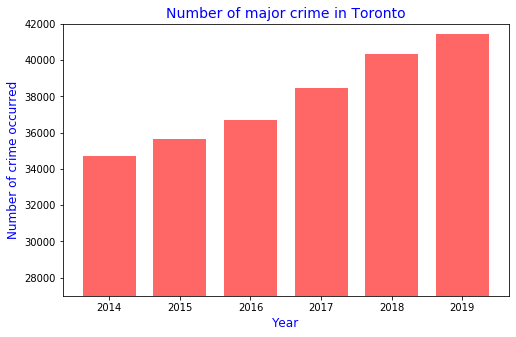

In [21]:
x_axis = crime_data["occurrenceyear"].unique()
y_value= crime_data_Grp_year['Count']

plt.figure(figsize=(8,5))
plt.bar(x_axis,y_value, width =0.75,color ='red',alpha=0.6)

plt.title("Number of major crime in Toronto",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.ylim(27000, 42000)

plt.savefig("Data Output/major_crime_year.png")
plt.show()



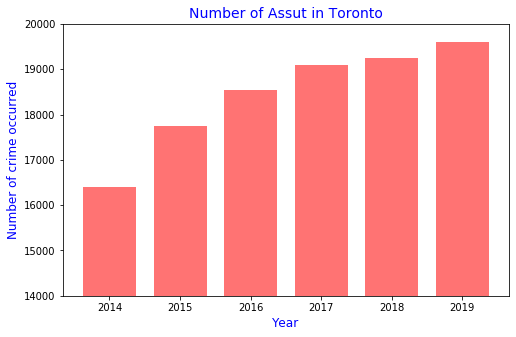

In [31]:
# Major crime type Assult in Toronto over the last 6 years

crime_data_assult=crime_data.loc[(crime_data['MCI']=="Assault")]
crime_data_assult_year=crime_data_assult.groupby('occurrenceyear').sum()

x_axis = crime_data_assult["occurrenceyear"].unique()
y_value= crime_data_assult_year['Count']

plt.figure(figsize=(8,5))
plt.bar(x_axis,y_value, width =0.75, color ='red',alpha=0.55)

plt.title("Number of Assut in Toronto",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.ylim(14000, 20000)

plt.savefig("Data Output/Assut_year.png")
plt.show()

In [27]:
crime_data_BnE=crime_data.loc[(crime_data['MCI']=="Break and Enter")]
crime_data_BnE_year=crime_data_BnE.groupby('occurrenceyear').sum()

crime_data_auto=crime_data.loc[(crime_data['MCI']=="Auto Theft")]
crime_data_auto_year=crime_data_auto.groupby('occurrenceyear').sum()

crime_data_robb=crime_data.loc[(crime_data['MCI']=="Robbery")]
crime_data_robb_year=crime_data_robb.groupby('occurrenceyear').sum()

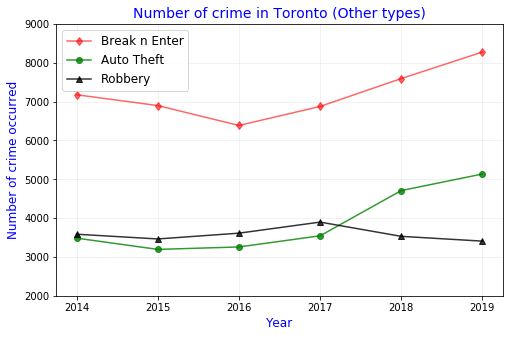

In [32]:
x_axis = crime_data_assult["occurrenceyear"].unique()

plt.figure(figsize=(8,5))

y_value= crime_data_BnE_year['Count']
BnE, =plt.plot(x_axis,y_value,color ='red',alpha=0.6, marker="d",label="Break n Enter")

y_value= crime_data_auto_year['Count']
auto, =plt.plot(x_axis,y_value,color ='green',alpha=0.8, marker="o",label="Auto Theft")

y_value= crime_data_robb_year['Count']
robb, =plt.plot(x_axis,y_value,color ='black',alpha=0.8, marker="^",label="Robbery")

plt.title("Number of crime in Toronto (Other types)",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.grid(alpha=0.2)
plt.ylim(2000, 9000)
plt.legend(handles=[BnE,auto, robb], loc="best",fontsize =12 )

plt.savefig("Data Output/Others_year.png")
plt.show()

# interesting observation: Robbery is downward since the peak in 2017